## Import necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

from sklearn.model_selection import train_test_split

## Read the data

In [16]:
train_df = pd.read_csv('./data/train.csv', index_col="S.No")
test_df = pd.read_csv('./data/test.csv', index_col="S.No")

In [17]:
train_df.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,LABELS
S.No,,,,,,,,,,,,,,,,,,,,
0,-24.758801,242.1875,16.019615,-4.391696,4.777769,-6.388222,7.725320,0.010277,102326.2344,102326.2344,221.594223,261.823212,6.660000e-09,295.622253,293.301514,197.698624,12234.78809,64.372635,20030804,0
1,23.820078,277.8125,47.802036,8.623652,9.308566,4.596105,9.938286,0.018531,100803.1094,100803.1094,220.343719,269.106720,3.670000e-16,302.496826,302.654083,71.571518,12463.97266,66.834389,20071006,1
2,23.820078,276.8750,11.556691,-2.483993,-6.009627,-3.503036,-5.921963,0.007468,101885.3906,101885.3906,215.933487,259.610718,0.000000e+00,299.854919,293.339996,160.414246,12099.36133,64.209663,20020331,0
3,13.494133,253.1250,53.186630,0.150933,-1.319407,3.757741,-2.172120,0.018809,100824.6328,100824.6328,218.457672,267.374329,9.800000e-08,301.606934,299.973450,72.840614,12379.26855,66.243294,20000906,0
4,-24.524120,241.2500,23.353998,-7.467506,-5.113565,-9.545109,-4.691221,0.011672,102553.8984,102553.8984,214.316605,263.575409,6.410000e-09,295.819488,295.101257,218.449570,12261.22656,64.876427,20000906,0


In [18]:
test_df.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
S.No,,,,,,,,,,,,,,,,,,,
0,-31.095176,353.1250,22.372244,-1.994936,-0.002513,-7.732825,-1.864900,0.008203,102809.6719,102809.6719,216.572952,258.135406,4.060000e-08,290.377930,289.014862,234.634003,12023.84082,63.400764,20130927
1,-31.095176,353.4375,21.536032,-2.058918,0.397359,-8.436489,-0.940275,0.007887,102816.6016,102816.6016,216.496490,258.205994,1.670000e-08,290.377228,288.873138,234.982056,12023.83301,63.348942,20130927
2,-31.095176,353.7500,20.465317,-2.128485,0.717785,-8.842417,0.152449,0.007695,102827.8594,102827.8594,216.268356,258.242279,1.220000e-08,290.377228,288.641480,235.631378,12025.41113,63.281322,20130927
3,-31.095176,354.0625,19.967148,-2.126235,1.123356,-8.773702,1.251795,0.007519,102830.5391,102830.5391,216.036041,258.335113,3.460000e-10,290.441406,288.420074,235.608460,12026.61426,63.216827,20130927
4,-31.095176,354.3750,19.598663,-2.053118,1.823581,-8.472447,2.225254,0.007293,102823.8516,102823.8516,215.934860,258.513702,5.920000e-10,290.468903,288.392975,235.004334,12027.29004,63.200485,20130927


In [19]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,47760.0,-2.933507e+00,2.290675e+01,-3.109518e+01,-2.458279e+01,-3.872229e+00,2.176662e+01,2.405476e+01
lon,47760.0,2.692708e+02,4.104659e+01,2.290625e+02,2.418750e+02,2.531250e+02,2.771875e+02,3.543750e+02
TMQ,47760.0,3.483568e+01,1.286955e+01,6.960679e+00,2.403308e+01,3.489657e+01,4.472710e+01,8.064136e+01
U850,47760.0,-6.202928e-01,6.847307e+00,-5.880523e+01,-5.507042e+00,-1.671802e+00,3.621788e+00,3.227734e+01
V850,47760.0,1.040469e-02,4.332385e+00,-2.621691e+01,-2.307535e+00,1.571722e-01,2.341779e+00,5.806025e+01
UBOT,47760.0,-2.152124e+00,6.043284e+00,-5.826048e+01,-6.589128e+00,-2.687853e+00,1.720815e+00,3.021539e+01
VBOT,47760.0,-7.594555e-01,4.761139e+00,-2.076045e+01,-3.800056e+00,-7.749922e-01,2.072186e+00,3.110628e+01
QREFHT,47760.0,1.437782e-02,3.969209e-03,4.363584e-03,1.124537e-02,1.456635e-02,1.798656e-02,2.236619e-02
PS,47760.0,1.015541e+05,5.458636e+02,9.661160e+04,1.011521e+05,1.015280e+05,1.018875e+05,1.039970e+05
PSL,47760.0,1.015563e+05,5.448553e+02,9.661160e+04,1.011576e+05,1.015312e+05,1.018889e+05,1.039970e+05


In [20]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,7320.0,-2.933507e+00,2.290808e+01,-3.109518e+01,-2.458279e+01,-3.872229e+00,2.176662e+01,2.405476e+01
lon,7320.0,2.692708e+02,4.104896e+01,2.290625e+02,2.418750e+02,2.531250e+02,2.771875e+02,3.543750e+02
TMQ,7320.0,3.619033e+01,1.405282e+01,1.017640e+01,2.373332e+01,3.620271e+01,4.840228e+01,6.949065e+01
U850,7320.0,-5.378949e-01,7.520631e+00,-3.560724e+01,-5.287402e+00,-1.184733e+00,3.720756e+00,2.233442e+01
V850,7320.0,5.343088e-01,4.363787e+00,-1.217288e+01,-2.354917e+00,5.286913e-01,2.938113e+00,1.529989e+01
UBOT,7320.0,-2.091177e+00,6.831562e+00,-2.722495e+01,-7.204344e+00,-2.510036e+00,2.249489e+00,1.722136e+01
VBOT,7320.0,-8.481899e-02,4.968153e+00,-1.641806e+01,-3.542063e+00,-2.708225e-01,3.396452e+00,1.632359e+01
QREFHT,7320.0,1.443893e-02,4.420418e-03,5.218535e-03,1.088273e-02,1.414398e-02,1.884807e-02,2.223912e-02
PS,7320.0,1.015728e+05,6.117430e+02,9.995482e+04,1.010652e+05,1.015505e+05,1.019987e+05,1.030886e+05
PSL,7320.0,1.015751e+05,6.103027e+02,9.995482e+04,1.010682e+05,1.015524e+05,1.019987e+05,1.030886e+05


### Visualize the imbalance in the data distribution for the labels

In [21]:
values = train_df['LABELS'].value_counts()
labels = [0,1,2]

In [22]:
wandb.login()
wandb.init(project="ift6390-extreme-weather-events")

data = [[label, val] for (label, val) in zip(labels, values)]
table = wandb.Table(data=data, columns = ["label", "value"])
wandb.log({"Imbalanced Data Representation" : wandb.plot.bar(table, "label", "value",
                               title="Distribution of Labels")})

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [8]:
#checking if there is any null values present
print(train_df.isnull().sum())

lat       0
lon       0
TMQ       0
U850      0
V850      0
UBOT      0
VBOT      0
QREFHT    0
PS        0
PSL       0
T200      0
T500      0
PRECT     0
TS        0
TREFHT    0
Z1000     0
Z200      0
ZBOT      0
time      0
LABELS    0
dtype: int64


### Visualize the heatmap for correlation between features

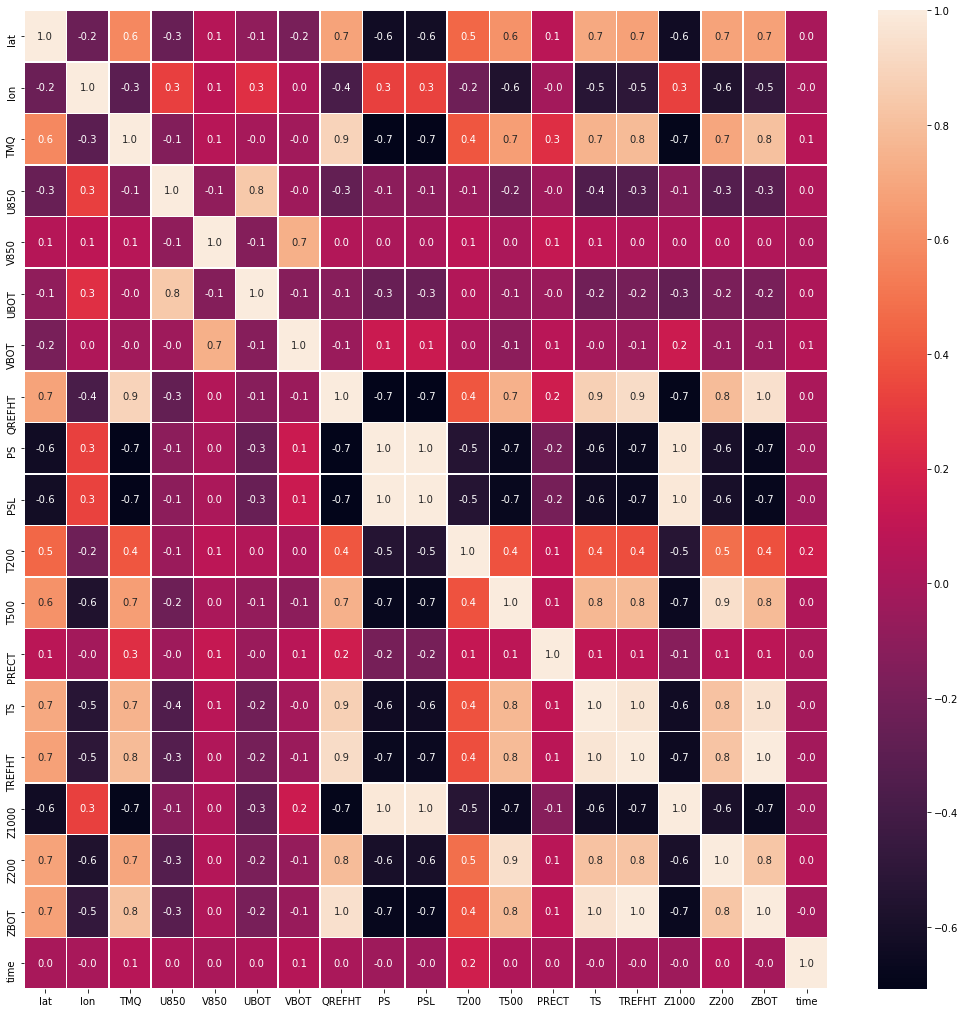

In [45]:
f,ax = plt.subplots(figsize=(18, 18))
wandb.log({'Feature Correlation' : wandb.Image(sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax))})

### Data Split

In [46]:
#splitting the train dataset 
X = train_df.iloc[:, :-1]
Y = train_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [47]:
wandb.run.finish()